In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, pow, exp, pi

In [2]:
def normpdf(x, m, s):
    return (1.0/sqrt(2*pi)*s) * exp(-0.5*pow(x-m, 2)/pow(s, 2))

In [3]:
observations = [5.5, 13.0, 15.0]
landmark_positions = [5.0, 10.0, 12.0, 20.0]

In [4]:
def range_estimator(landmark_positions, position):
    ranges = []
    for l_position in landmark_positions:
        dist = l_position - position
        if dist > 0.0:
            ranges.append(dist)
        else:
            ranges.append(25.0)
    return sorted(ranges)

In [6]:
observation_prob = []
for i in range(25):
    prob = 1.0
    landmark_ranges = range_estimator(landmark_positions, float(i))
    for j in range(len(observations)):
        prob *= normpdf(observations[j], landmark_ranges[j], 1.0)
    observation_prob.append([i, prob])
observation_prob = np.array(observation_prob)

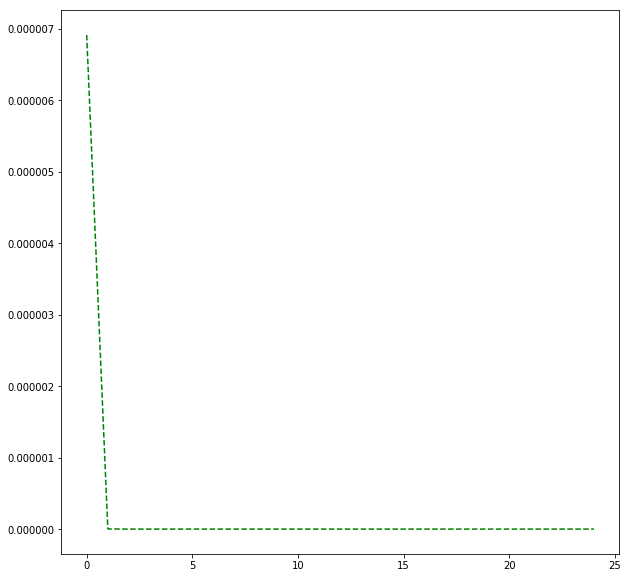

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(observation_prob[:, 0], observation_prob[:, 1], '--g')
plt.savefig('observation.jpg')
plt.show()